In [14]:
import sys
import pandas as pd

parent_dir = '/home/sei/tetrahedron_pair_ML'
sys.path.append(parent_dir)

n = 10000
tetrahedron_dataset = pd.read_csv('/home/sei/tetrahedron_pair_ML/data/processed/train/train_data.csv', nrows=n) # load only n, where n is the number of samples to 

def has_t2_columns(df):
    """Check if the dataframe contains T2 columns"""
    return any(col.startswith('T2_') for col in df.columns)

### Dataset Structure:

In [15]:
tetrahedron_dataset.head()

,T1_v1_x,T1_v1_y,T1_v1_z,T1_v2_x,T1_v2_y,T1_v2_z,T1_v3_x,T1_v3_y,T1_v3_z,T1_v4_x,T1_v4_y,T1_v4_z,IntersectionVolume,HasIntersection
0,1.712470,-0.383875,1.490116e-07,1.000003,-0.201591,8.940697e-08,0.072474,1.049873,0.000000e+00,3.321091,-3.292698,-0.120292,0.0,1
1,1.274526,0.093700,-2.600512e-01,1.063211,0.111945,4.888380e-01,1.383358,0.453606,6.479716e-02,1.684783,-0.261770,-0.090668,0.0,0
2,0.008559,0.092686,-4.470348e-08,-0.368886,0.412223,-1.233409e-01,0.623753,-0.138394,-5.148462e-01,-0.424528,0.372491,-0.369540,0.0,1
3,0.894115,0.313121,-3.507490e-01,0.638065,1.375084,8.648050e-01,1.137877,1.746103,7.664006e-01,0.239412,2.973110,3.260068,0.0,0
4,0.636017,-1.193860,-7.152557e-07,0.800396,-2.627385,-4.768372e-07,-0.093491,1.100108,2.160668e-07,2.657313,-3.541670,-1.496588,0.0,1


- **Tetrahedrons:**
  - Each entry includes two tetrahedrons.
  - Each tetrahedron has four vertices.
  - Each vertex is defined by three coordinates (x, y, z).

- **Features:**
  - There are 12 features per tetrahedron, leading to 24 features total.
  - Column names follow the pattern `Tₜ_Vᵥ_α`, where:
    - `ₜ` = Tetrahedron number (1 or 2)
    - `ᵥ` = Vertex number (1 to 4)
    - `α` = Coordinate axis (x, y, or z)
  - Coordinates are normalized between 0 and 1.
  - Each coordinate is randomly generated through a i.i.d process.

- **Output Variables:**
  - **Intersection Status:**
    - Stored in the "intersection_status" column.
    - Values: `0` (no intersection) or `1` (intersection).
  - **Intersection Volume:**
    - Stored in the "intersection_volume" column.
    - Value is a non-negative real number.

### Input and Output Spaces:

- **Input Space:**
  - Represented as a vector in $\mathbb{R}^{24}$, where each coordinate is within the range $[0, 1]$.

- **Output Space:**
  - $\{0, 1\}$ for "HasIntersection".
  - $\mathbb{R}^{\geq 0}$ for "IntersectionVolume"

### Statistics


In [16]:
tetrahedron_dataset.describe()

,T1_v1_x,T1_v1_y,T1_v1_z,T1_v2_x,T1_v2_y,T1_v2_z,T1_v3_x,T1_v3_y,T1_v3_z,T1_v4_x,T1_v4_y,T1_v4_z,IntersectionVolume,HasIntersection
count,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.853661,-0.102029,7.241247e-02,1.298689,0.734325,-8.640157e-01,2.695485,1.382701,-2.249325e+00,2.296152,1.286246,-2.330018,1346.798062,0.56770
std,48.252275,39.394313,4.071641e+01,73.151056,45.788163,7.376870e+01,136.939474,146.888694,1.789241e+02,85.671052,83.206811,105.170688,2672.144900,0.49542
min,-1297.150600,-1730.839700,-3.059903e+03,-672.984860,-1199.786500,-6.862998e+03,-803.319340,-3903.752200,-1.650423e+04,-847.330440,-2076.023700,-8825.717000,0.000000,0.00000
25%,-0.322202,-0.344759,-1.452499e-01,-0.419099,-0.390028,-2.538321e-01,-0.355691,-0.356255,-3.444776e-01,-0.354682,-0.348598,-0.692647,0.000000,0.00000
50%,0.305453,0.295046,5.913898e-08,0.302120,0.324146,3.259629e-08,0.319457,0.342075,5.529728e-09,0.364279,0.368477,-0.065546,0.000000,1.00000
75%,0.940894,0.919030,6.951449e-01,0.994598,1.002918,6.969184e-01,0.991358,0.988189,7.056022e-01,1.093482,1.097402,0.722313,737.586960,1.00000
max,3038.878000,1336.946300,1.957911e+03,6814.412600,2997.023400,7.594828e+02,10614.197000,13098.958000,1.602941e+03,5675.931000,7005.563000,690.483000,9985.037810,1.00000


#### Class Balance

In [17]:
total_entries = len(tetrahedron_dataset)
status_0_count = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 0].shape[0]
status_1_count = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 1].shape[0]

percentage_status_0 = (status_0_count / total_entries) * 100
percentage_status_1 = (status_1_count / total_entries) * 100

print(f"Percentage of entries with HasIntersection = 0: {percentage_status_0:.2f}%")
print(f"Percentage of entries with HasIntersection = 1: {percentage_status_1:.2f}%")

Percentage of entries with HasIntersection = 0: 43.23%
Percentage of entries with HasIntersection = 1: 56.77%


#### Coordinates precision

In [18]:
# Extract all coordinate columns
coordinate_columns = [col for col in tetrahedron_dataset.columns if '_v' in col]

def calculate_precision(value):
    value_str = str(value)
    if '.' in value_str:
        return len(value_str.split('.')[1])
    else:
        return 0

max_precision = 0
min_precision = float('inf')

for col in coordinate_columns:
    col_precision = tetrahedron_dataset[col].map(calculate_precision)
    max_precision = max(max_precision, col_precision.max())
    min_precision = min(min_precision, col_precision.min())

print(f"Min coordinate precision in the dataset: {min_precision} decimal places")
print(f"Max coordinate precision in the dataset: {max_precision} decimal places")

Min coordinate precision in the dataset: 1 decimal places
Max coordinate precision in the dataset: 12 decimal places


#### Coordinates distribution

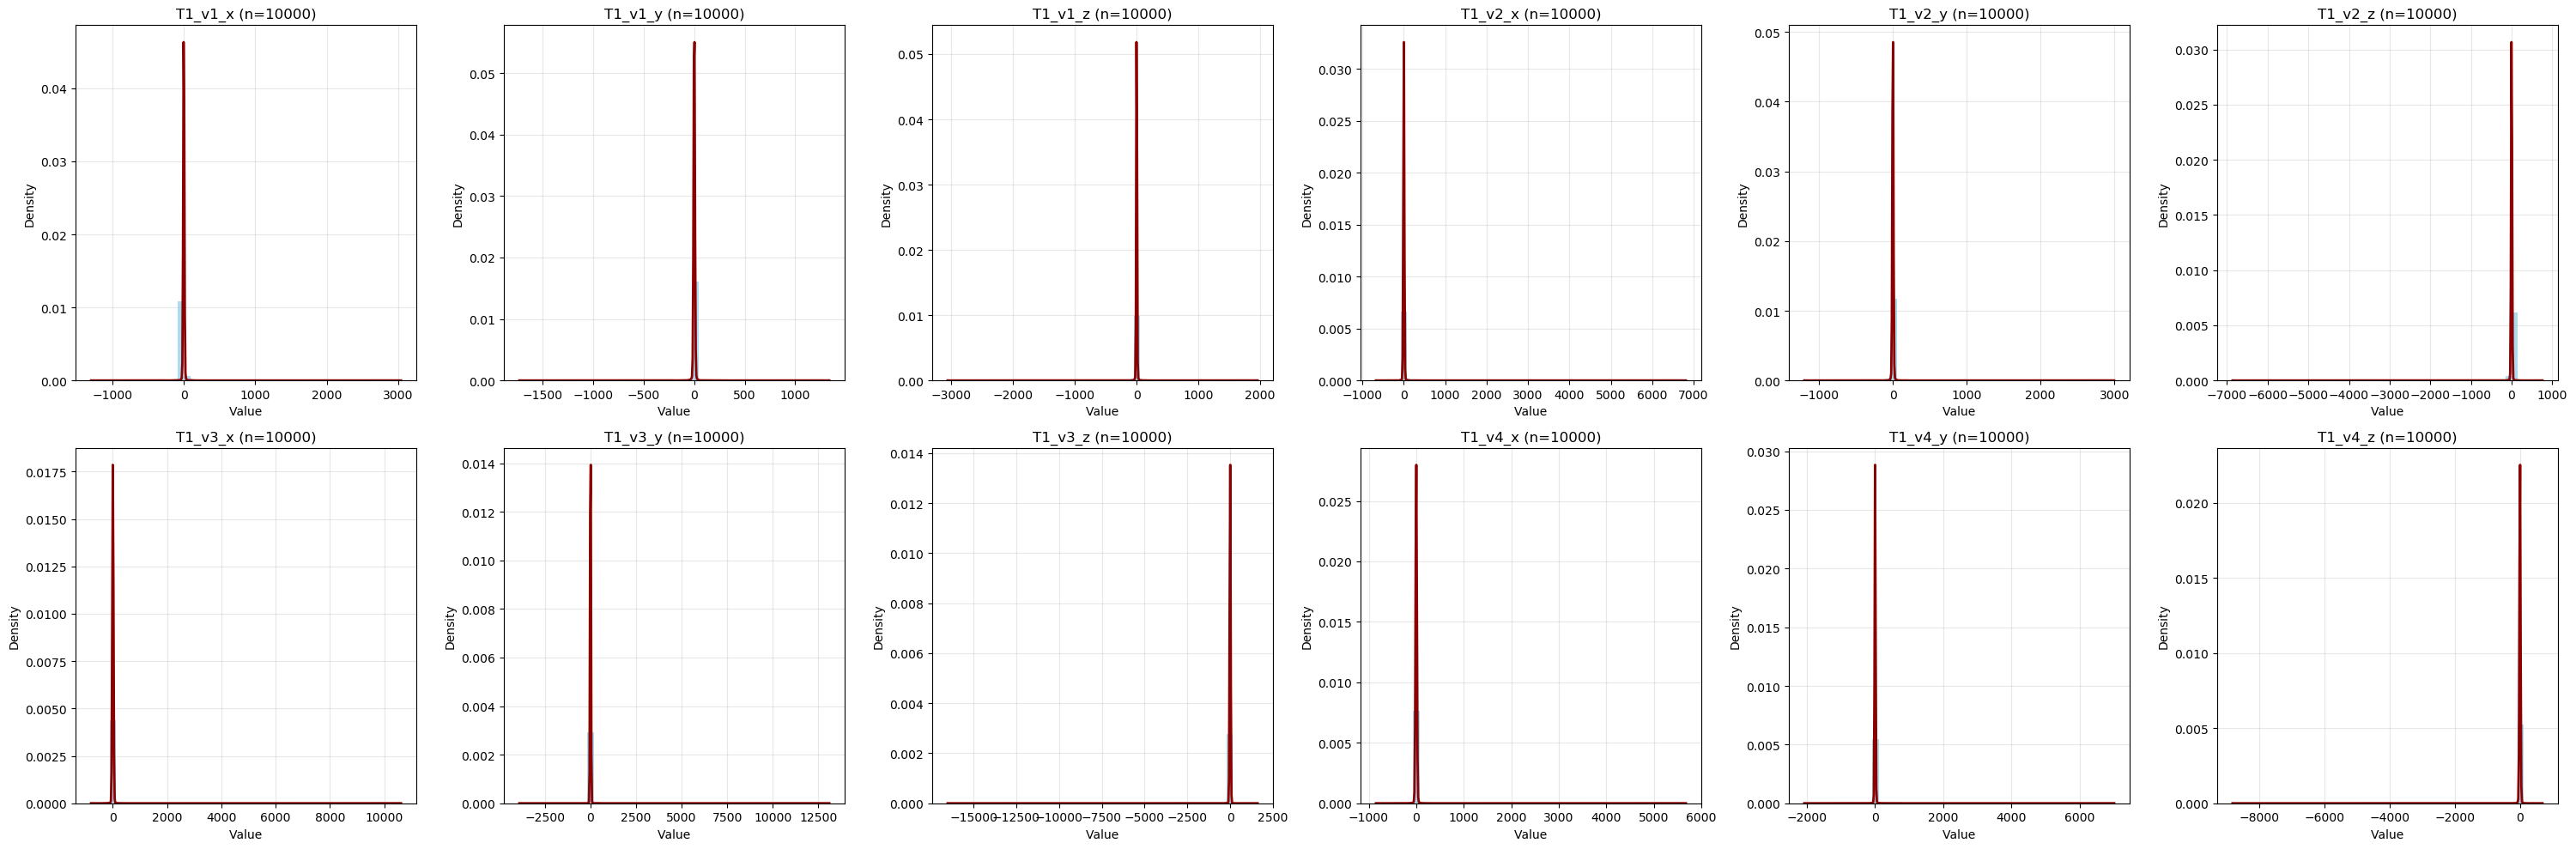

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from scipy.stats import gaussian_kde

# Define tetrahedrons, points, and coordinates
tetrahedrons = ['T1']
if has_t2_columns(tetrahedron_dataset):
    tetrahedrons.append('T2')
points = ['v1', 'v2', 'v3', 'v4']
coordinates = ['x', 'y', 'z']

# Build the list of column names in the order: T1_v1_x, T1_v1_y, T1_v1_z, ..., T2_v4_z
columns = [f'{tetra}_{point}_{coord}' for tetra in tetrahedrons for point in points for coord in coordinates]

# Adjust your subplot layout based on number of columns
ncols = min(6, len(columns))
nrows = (len(columns) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 5*nrows))
axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]  # Handle single plot case


for ax, col in zip(axes, columns):
    # Extract the data for the current column from the DataFrame
    data = np.ravel(tetrahedron_dataset[col].to_numpy(copy=False))
    
    # Plot the histogram (normalized to density)
    ax.hist(data, bins=50, color='skyblue', density=True, alpha=0.7)
    
    # Compute and plot the Kernel Density Estimate
    kde = gaussian_kde(data)
    x_vals = np.linspace(data.min(), data.max(), 500)
    ax.plot(x_vals, kde(x_vals), color='darkred', lw=2)
    
    # Formatting
    ax.set_title(f'{col} (n={len(data)})', fontsize=12)
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


#### Tetrahedron volume distribution

In [20]:
### Get Data ###
import src.GeometryUtils as gu


def extract_t1_vertices(row):
    return torch.tensor([
        [row['T1_v1_x'], row['T1_v1_y'], row['T1_v1_z']],
        [row['T1_v2_x'], row['T1_v2_y'], row['T1_v2_z']],
        [row['T1_v3_x'], row['T1_v3_y'], row['T1_v3_z']],
        [row['T1_v4_x'], row['T1_v4_y'], row['T1_v4_z']]
    ])

def extract_t2_vertices(row):
    return torch.tensor([
        [row['T2_v1_x'], row['T2_v1_y'], row['T2_v1_z']],
        [row['T2_v2_x'], row['T2_v2_y'], row['T2_v2_z']],
        [row['T2_v3_x'], row['T2_v3_y'], row['T2_v3_z']],
        [row['T2_v4_x'], row['T2_v4_y'], row['T2_v4_z']]
    ])

t1_volumes = []
t2_volumes = []

for _, row in tetrahedron_dataset.iterrows():
    t1_vertices = extract_t1_vertices(row)
    volume = gu.calculate_tetrahedron_volume(t1_vertices)
    t1_volumes.append(volume.item())
    
    if has_t2_columns(tetrahedron_dataset):
        t2_vertices = extract_t2_vertices(row)
        volume = gu.calculate_tetrahedron_volume(t2_vertices)
        t2_volumes.append(volume.item())

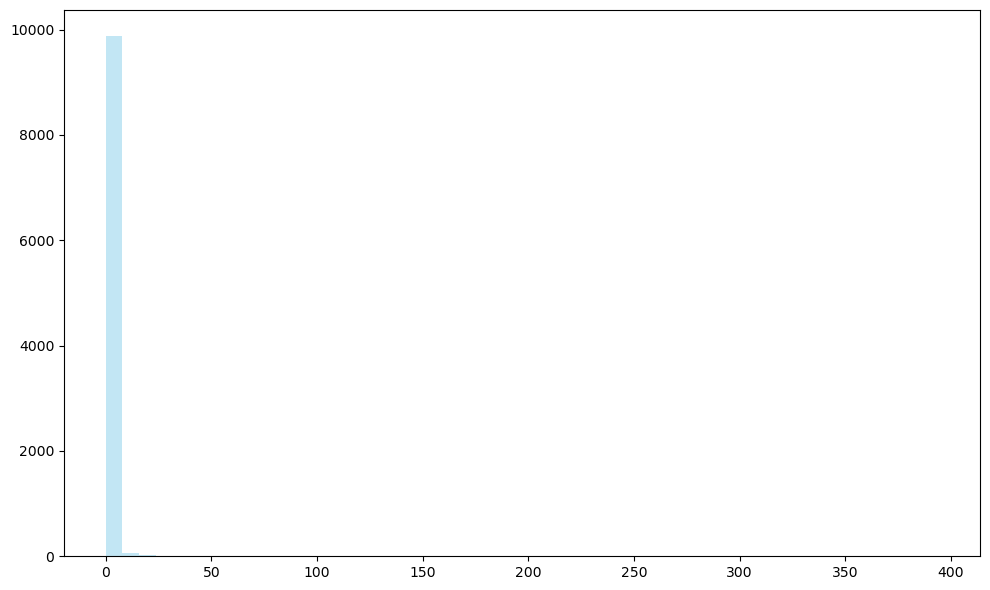

In [21]:
volumes_t1 = np.array(t1_volumes).ravel()
volumes_t2 = np.array(t2_volumes).ravel()

if has_t2_columns(tetrahedron_dataset):
    # Create two subplots (original code)
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))

    # Plot for T1
    counts, bins, _ = axes[0].hist(volumes_t1, bins=50, color='skyblue', alpha=0.5)
    kde = gaussian_kde(volumes_t1)
    x = np.linspace(volumes_t1.min(), volumes_t1.max(), 500)
    axes[0].plot(x, kde(x) * len(volumes_t1) * (bins[1] - bins[0]), color='darkred', lw=2)
    axes[0].set_title(f'Distribution of T1 Volumes (n={len(volumes_t1)})', fontsize=16)
    axes[0].set_xlabel('Volume', fontsize=14)
    axes[0].set_ylabel('Count', fontsize=14)
    axes[0].set_xlim(0, volumes_t1.max())
    axes[0].grid(True, alpha=0.3)

    # Plot for T2
    counts, bins, _ = axes[1].hist(volumes_t2, bins=50, color='skyblue', alpha=0.5)
    kde = gaussian_kde(volumes_t2)
    x = np.linspace(volumes_t2.min(), volumes_t2.max(), 500)
    axes[1].plot(x, kde(x) * len(volumes_t2) * (bins[1] - bins[0]), color='darkred', lw=2)
    axes[1].set_title(f'Distribution of T2 Volumes (n={len(volumes_t2)})', fontsize=16)
    axes[1].set_xlabel('Volume', fontsize=14)
    axes[1].set_ylabel('Count', fontsize=14)
    axes[1].set_xlim(0, volumes_t2.max())
    axes[1].grid(True, alpha=0.3)


else:
    # Create a single plot for T1 only
    fig, ax = plt.subplots(figsize=(10, 6))
    counts, bins, _ = ax.hist(volumes_t1, bins=50, color='skyblue', alpha=0.5)

    # Plot for T1
    counts, bins, _ = axes[0].hist(volumes_t1, bins=50, color='skyblue', alpha=0.5)
    kde = gaussian_kde(volumes_t1)
    x = np.linspace(volumes_t1.min(), volumes_t1.max(), 500)
    axes[0].plot(x, kde(x) * len(volumes_t1) * (bins[1] - bins[0]), color='darkred', lw=2)
    axes[0].set_title(f'Distribution of T1 Volumes (n={len(volumes_t1)})', fontsize=16)
    axes[0].set_xlabel('Volume', fontsize=14)
    axes[0].set_ylabel('Count', fontsize=14)
    axes[0].set_xlim(0, volumes_t1.max())
    axes[0].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


#### Intersection volume distribution

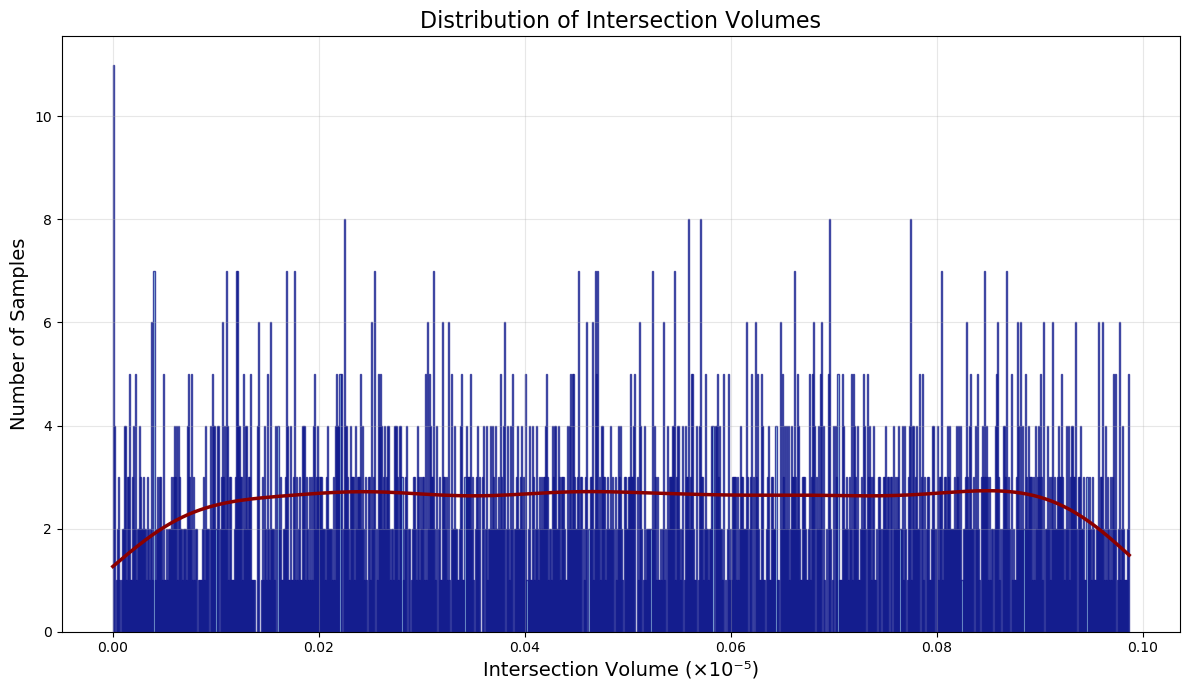

In [33]:
intersecting_cases = tetrahedron_dataset[tetrahedron_dataset['IntersectionVolume'] > 0]

# Calculate appropriate range from data
scaling_factor = 100000  # Document why this scaling is needed
volumes = intersecting_cases['IntersectionVolume'].to_numpy() / scaling_factor
max_vol = np.percentile(volumes, 99)  # Use 99th percentile to avoid outliers
n_bins = 1000  # More bins for better resolution

plt.figure(figsize=(12, 7))

# Use actual counts
counts, bins, _ = plt.hist(volumes, 
                           bins=n_bins,
                           range=(0, max_vol),
                           color='skyblue',
                           edgecolor='navy', 
                           alpha=0.7)

# Properly scaled KDE with many more points
kde = gaussian_kde(volumes)
x = np.linspace(0, max_vol, 500)  # 500 points for smooth curve
bin_width = bins[1] - bins[0]
plt.plot(x, kde(x) * len(volumes) * bin_width,
         color='darkred', 
         lw=2.5)

plt.title(f'Distribution of Intersection Volumes', fontsize=16)
plt.xlabel(f'Intersection Volume (×10⁻⁵)', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()

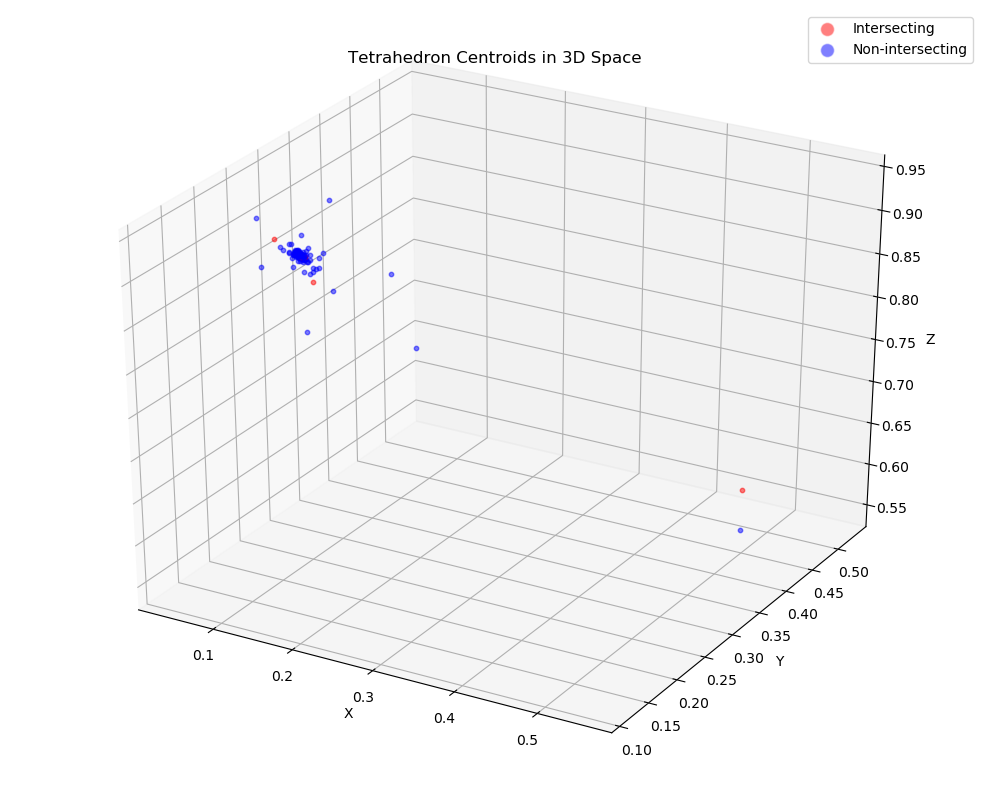

In [29]:
from matplotlib.lines import Line2D  # Import for custom legend

def calculate_centroids(df):
    centroids_t1 = []
    centroids_t2 = []
    has_intersection = []
    
    has_t2 = has_t2_columns(df)
    
    for _, row in df.iterrows():
        # Extract vertices for first tetrahedron (T1)
        t1_vertices = []
        for i in range(1, 5): # 4 vertices
            vertex = [row[f'T1_v{i}_x'], row[f'T1_v{i}_y'], row[f'T1_v{i}_z']]
            t1_vertices.append(vertex)
        
        # Calculate centroids (average of the 4 vertices)
        centroid_t1 = np.mean(t1_vertices, axis=0)
        centroids_t1.append(centroid_t1)
        
        # Only process T2 if it exists in the data
        if has_t2:
            t2_vertices = []
            for i in range(1, 5):
                vertex = [row[f'T2_v{i}_x'], row[f'T2_v{i}_y'], row[f'T2_v{i}_z']]
                t2_vertices.append(vertex)
            
            centroid_t2 = np.mean(t2_vertices, axis=0)
            centroids_t2.append(centroid_t2)
        
        has_intersection.append(row['HasIntersection'])
    
    return np.array(centroids_t1), np.array(centroids_t2) if centroids_t2 else None, np.array(has_intersection)

# Calculate centroids
centroids_t1, centroids_t2, has_intersection = calculate_centroids(tetrahedron_dataset)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot centroids, color based on intersection
for i in range(len(centroids_t1)):
    color = 'red' if has_intersection[i] else 'blue'
    ax.scatter(centroids_t1[i][0], centroids_t1[i][1], centroids_t1[i][2], c=color, alpha=0.5, s=10)

    # Only plot T2 centroids if they exist
    if centroids_t2 is not None:
        ax.scatter(centroids_t2[i][0], centroids_t2[i][1], centroids_t2[i][2], c=color, alpha=0.5, s=10)

# Create custom legend elements
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, alpha=0.5, label='Intersecting'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, alpha=0.5, label='Non-intersecting')
]

# Add the legend
ax.legend(handles=legend_elements, loc='upper right')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Tetrahedron Centroids in 3D Space')

plt.tight_layout()
plt.show()